# MTH 480 - Is it a Cat?

This model is excerpted from Chapter 1 of the book ["Fast AI for Coders ..."](https://course.fast.ai/Resources/book.html)

The next cell downloads a public dataset with 37 species of dogs and also cats (not separated by species), defines a model (which has been pre-trained on natural images), and fine tunes that model on the pets dataset.

After training the model is amazingly accurate at distinguishing cats and dogs!

Be sure to select a GPU under the "Runtime" menu at the top or this code will be VERY slow.  Even with a GPU this will take a few minutes.

In [1]:
# run me first (choose Runtime -> Change Runtime -> T4 GPU first or try TPU which may be faster)
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/root/.fastai/data/oxford-iiit-pet/images


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 116MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.168530,0.028545,0.009472,00:52


epoch,train_loss,valid_loss,error_rate,time
0,0.066843,0.027419,0.007442,00:59


This next cell allows us to upload an image to test the model.  Choose an image that shows only a single cat or dog.

In [3]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Display your image:

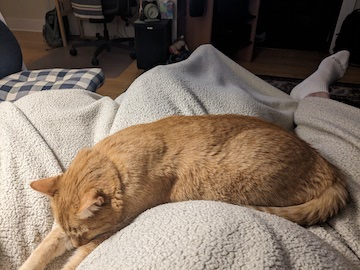

In [4]:
img = PILImage.create(uploader.data[0])
img

Now make a prediction for your image and display the result.  Note the model is specifically trained for "cat" vs "not cat" so if you apply the model to something like a "truck" it  should predict "not cat".

In [5]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999935
